<a href="https://colab.research.google.com/github/Chaitra-B-V/EDA-ApacheBeam/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis for Census Income Dataset**

In [2]:
!pip install basemap
!pip3 install pandas matplotlib seaborn geopandas 
!pip3 install scikit-learn scipy bioinfokit 
!pip3 install descartes
!pip install pygal_maps_world
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
%matplotlib inline
# General packages
import itertools
import pandas as pd
import numpy as np
# Packages for visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# Packages for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (KMeans, 
    AgglomerativeClustering)
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import bioinfokit.visuz
from mpl_toolkits.basemap import Basemap
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Welcome to census Data


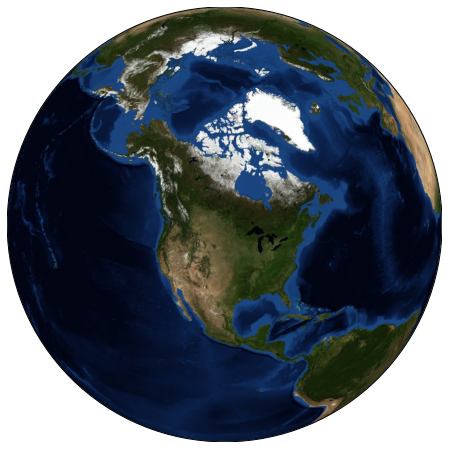

In [4]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);
print("Welcome to census Data")

1. Title of Database: Census Income

2. Sources:
    UC Irvine machine learning repository
   https://archive-beta.ics.uci.edu/ml/datasets/census+income

3. Number of Attributes 
   6 continuous, 8 nominal attributes.

4. Attribute Information: 

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

8. Missing Attribute Values: 

   7% have missing values.

9. Class Distribution: 

 Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
 Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)




**Welcome to EDA Process with Census Data**

In [61]:
d=pd.read_csv(r"adult.csv")
print(d.head())

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [62]:
d.columns=['age','workclass','fnlwgt','education','education-num',
           'marital-status','occupation','relationship','race','sex',
           'capital-gain','capital-loss','hours-per-week','native-country','class']
print("columns=", d.columns)
print("shape of the data",d.shape)

columns= Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
shape of the data (32560, 15)


In [63]:
print(d['workclass'].value_counts())
print(d['workclass'].value_counts(normalize=True))

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64


Replacing '?' with nan values

In [64]:
d.replace({' ?':np.nan},inplace=True)

In [65]:
print("Missing values in data: \n")
d.isnull().sum()


Missing values in data: 



age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

Histogram For Age: We can depict from the below graph that majority of individuals are 25 to 35 years old

In [66]:
d['native-country'].fillna('Unknown', inplace=True)
d['occupation'].fillna('Unknown', inplace=True)
d['workclass'].fillna('Unknown', inplace=True)

In [67]:
IncomeGreaterThan50K = {" >50K" : 1,
                     " <=50K" : 0}                   
print(IncomeGreaterThan50K)

IncomeLessThan50K = {" >50K": 0,
" <=50K": 1}
print(IncomeLessThan50K)

{' >50K': 1, ' <=50K': 0}
{' >50K': 0, ' <=50K': 1}


In [68]:
d['IncomeGreaterThan50K']=d['class'].map(IncomeGreaterThan50K)
d['IncomeLessThan50K']=d['class'].map(IncomeLessThan50K)

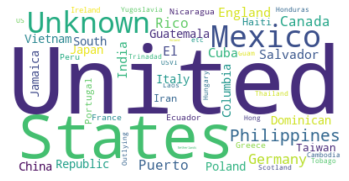

In [69]:
from wordcloud import WordCloud
#Creating the text variable

text2 = " ".join(title for title in d['native-country'])

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

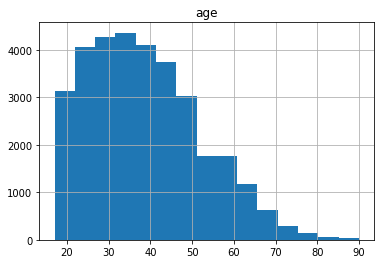

In [14]:
d.hist(column="age",bins=15)
plt.show()

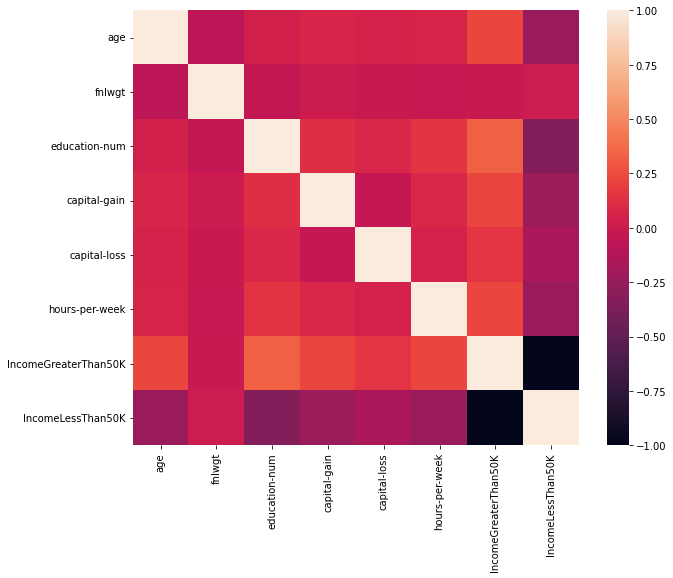

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = d.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Pair Plot - To visualize pairwise relationship of the variables

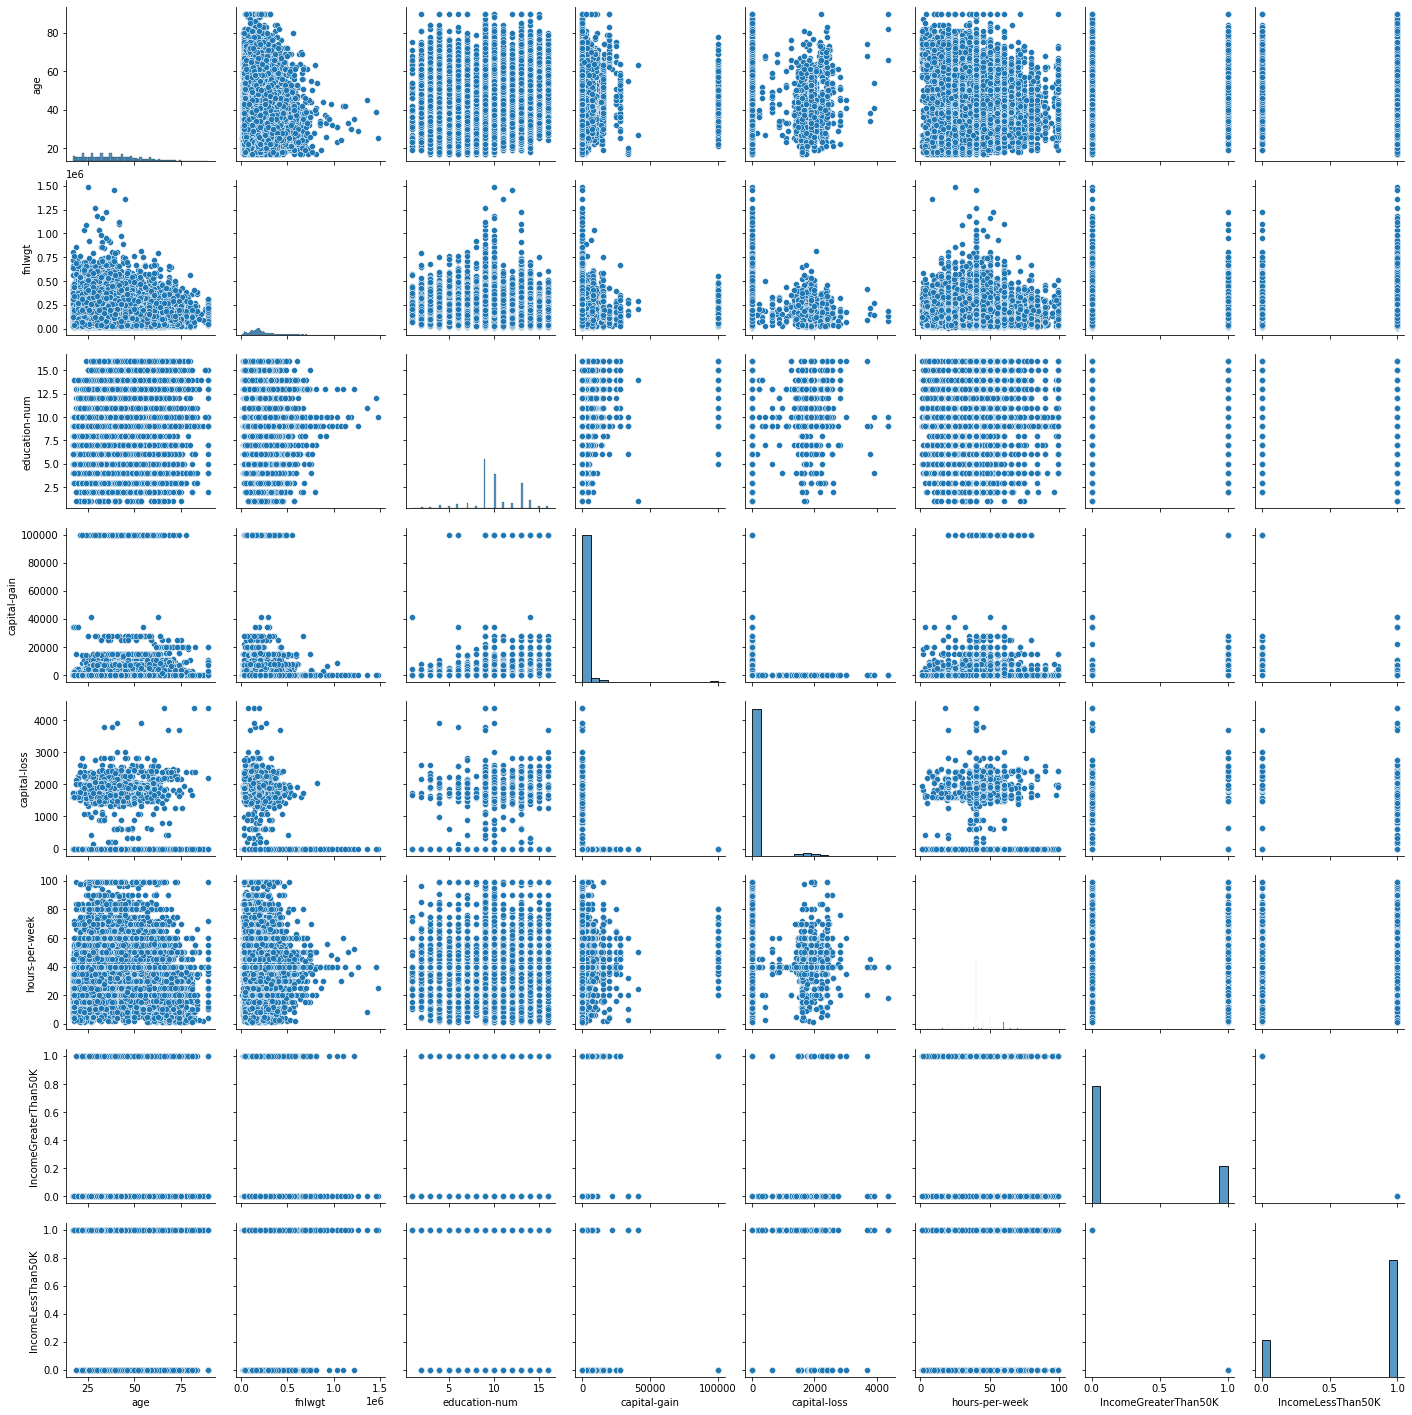

In [16]:
sns.pairplot(d,markers=d['class'])
plt.show()


Count of countries in the dataset

In [17]:
print(d['native-country'].value_counts())

 United-States                 29169
 Mexico                          643
Unknown                          583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [18]:
d.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,IncomeGreaterThan50K,IncomeLessThan50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,1


No of Males and females in the dataset

In [19]:
print(d['sex'].value_counts())
print(d['sex'].value_counts(normalize=True))

 Male      21789
 Female    10771
Name: sex, dtype: int64
 Male      0.669195
 Female    0.330805
Name: sex, dtype: float64


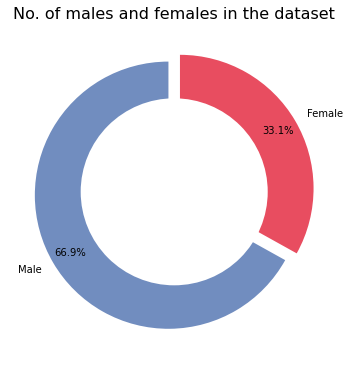

In [20]:
from bokeh.palettes import GnBu3, OrRd3
colors = [ "#718dbf", "#e84d60","#c9d9d3"]
labels = ['Male','Female']
my_colors = ["#718dbf", "#e84d60","#c9d9d3" "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]
#colors = my_colors
explode = (0.05,0.05)

plt.figure(figsize=(5,5))
plt.pie(d['sex'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.title("No. of males and females in the dataset", size = "16")
plt.show()

No. of males and females with income greater than 50K

In [21]:
print(pd.crosstab(d["sex"], 
                  d["class"]))

class     <=50K   >50K
sex                   
 Female    9592   1179
 Male     15127   6662


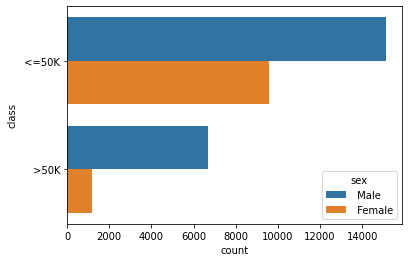

In [22]:
sns.countplot(data=d, y="class", hue="sex")

Most Popular Workclass

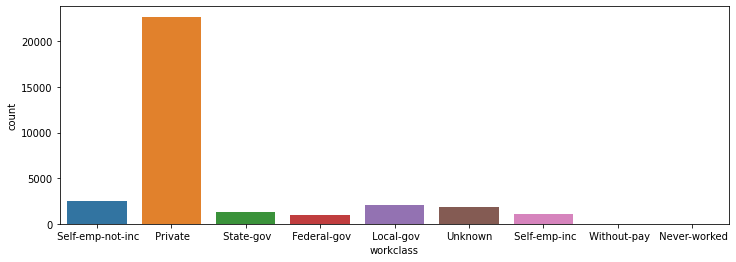

In [23]:
plt.figure(figsize=(12,4)) # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x=d["workclass"])
plt.show()

Age of Individuals along with their country of residence
-> we can deduce that Hungry has larger range of people age 30 to 60

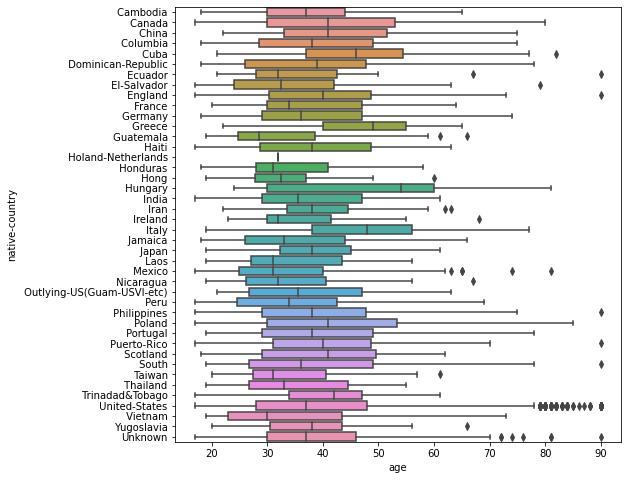

In [24]:
d=d.sort_values(by='native-country')
plt.figure(figsize=(8,8))
sns.boxplot(x='age',y='native-country',data=d)
plt.show()


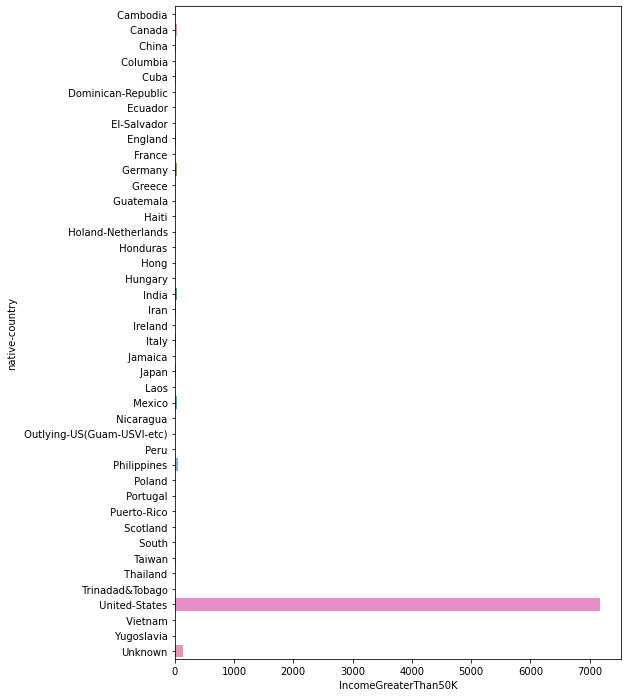

In [25]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import FactorRange
output_notebook()
f1 = pd.DataFrame() 
f1 = d.groupby('native-country')[['IncomeGreaterThan50K','IncomeLessThan50K']].sum().reset_index()
f1=f1.sort_values(by='native-country')
plt.figure(figsize=(8,12))
sns.barplot(x='IncomeGreaterThan50K',y='native-country',data=f1)
plt.show()

In [26]:
#plot = d.plot.pie(subplots=True, figsize=(11, 6))

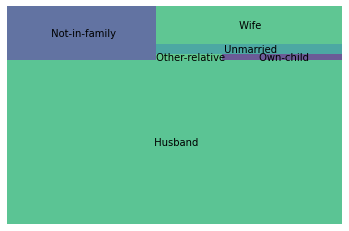

In [27]:
import seaborn as sns
import squarify 
import matplotlib.pyplot as plt
 

 
a = d.groupby('relationship')[['IncomeGreaterThan50K']].sum().index.get_level_values(0).tolist()
 
d1 = d.groupby('relationship')[['IncomeGreaterThan50K']].sum().reset_index().IncomeGreaterThan50K.values.tolist()
 
squarify.plot(sizes=d1,label=a, alpha=0.8,norm_x=500,norm_y=2000)
plt.axis('off')
plt.show()

In [28]:
# Import reset_output (only needed once) 
from bokeh.plotting import reset_output
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
# Use reset_output() between subsequent show() calls, as needed
output_notebook()
grouped = d.groupby('occupation')[['IncomeGreaterThan50K','IncomeLessThan50K']].sum()
source = ColumnDataSource(grouped)
countries = source.data['occupation'].tolist()
p = figure(x_range=countries,plot_width=800)
p.xaxis.major_label_orientation = 3.14/4
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, Turbo256
color_map = factor_cmap(field_name='occupation',
                    palette=Viridis[11], factors=countries)

p.vbar(x='occupation', top='IncomeGreaterThan50K', source=source, width=0.9, color=color_map)

p.title.text ='No. of Individuals who earn more than 50K, Occupation Wise'
p.xaxis.axis_label = 'Occupation'
p.yaxis.axis_label = 'Income Greater than 50K'
hover = HoverTool()
hover.tooltips = [
    ("Counts","Income greater than 50K: @IncomeGreaterThan50K  / Income less than 50K:@IncomeLessThan50K / Occupation: @occupation")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

In [71]:
grouped1 = d.groupby('education')[['IncomeGreaterThan50K','IncomeLessThan50K']].sum()
source = ColumnDataSource(grouped1)
countries = source.data['education'].tolist()
p = figure(x_range=countries,plot_width=800)
p.xaxis.major_label_orientation = 3.14/4
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, Turbo256
color_map = factor_cmap(field_name='education',
                    palette=Turbo256, factors=countries)

p.vbar(x='education', top='IncomeLessThan50K', source=source, width=0.9, color=color_map)

p.title.text ='No. of Individuals who earn less than 50K, Occupation Wise'
p.xaxis.axis_label = 'education'
p.yaxis.axis_label = 'Income Greater than 50K'
hover = HoverTool()
hover.tooltips = [
    ("Counts","Income greater than 50K: @IncomeGreaterThan50K  / Income less than 50K:@IncomeLessThan50K / education: @education")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

In [30]:
csv_data=grouped1.copy()

In [46]:

# start a local server
port = 8888
get_ipython().system_raw('python3 -m http.server ' + str(port) + ' &')


In [47]:
# import some dependencies we'll need soon

from IPython.core.display import HTML
from string import Template
import json, random

# initialize the template that will be used later as the 
# basis for the rendered 'html' page
html_page = """
  <link rel="stylesheet" href="https://localhost:$port/linecharts.css"/>
  <script src='https://d3js.org/d3.v7.min.js'></script>
  <script src="https://localhost:$port/linecharts.js"/>
"""

# port was defined in a separate gist, where we started 
# the http.server
html_page = html_page.replace("$port", str(port)).strip()

In [48]:
%%writefile linecharts.css
path.line {
  fill: none;
  stroke-width: 2;
}

.axis text {
  fill: #fff;
  font-family: Georgia;
  font-size: 9px;
}

.line_label {
  font-family: Georgia;
  font-size: 10px;
}

Overwriting linecharts.css


In [49]:
%%writefile linecharts.js
timeConv = d3.timeParse("%Y-%m-%d");
vendor_data_slices = { 1 : [], 2 : []}

csv_data = d3.csv("/content/grouped1.csv", function(row) { 
  row['education'] = row['education']
  row['count'] = parseInt(row['IncomeGreaterThan50K'])

})
csv_data.then(function(data) {

    console.log(data);
    console.log(vendor_data_slices);
 
});

Overwriting linecharts.js


In [50]:
display(HTML(html_page))

In [36]:
%%writefile -a linecharts.js

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [51]:
!sed -i ‘$ d’ linecharts.js

sed: -e expression #1, char 1: unknown command: `�'


In [52]:
%%writefile -a linecharts.js

    width = 1200; height = 600; margin = 20; padding = 140;

    var svg = d3.select("body")
                .append("svg")
                .attr("id", "svg")
                .attr("width", width)
                .attr("height", height);

    svg.text("NY Taxi Data - Simple Line Charts with D3").attr("id", "title")

    plot = svg.append("g").attr("id", "plot")

});

Appending to linecharts.js


In [53]:
%%writefile -a linecharts.js

    xScale = d3.scaleTime().range([0 + padding, width - padding]);
    yScale = d3.scaleLinear().rangeRound([height  - .5 * padding, 0 + .5 * padding]);

    xScale.domain(d3.extent(data, function(d){ return d.lpep_pickup_date; }));
    yScale.domain([(0), d3.max(data, function(d) { return d.count;}) ]);

    yaxis = d3.axisLeft().scale(yScale);

    // get the number of days for a given month
    no_days_in_month = new Date(2021, 1, 0). getDate();

    xaxis = d3.axisBottom()
                .ticks(no_days_in_month)
                .tickFormat(d3.timeFormat('%a %e'))
                .scale(xScale);

    x_axis = plot.append("g")
        .attr("id", "x-axis")
        .attr("class", "axis")
        .attr("transform", "translate(0," + (height - .5 * padding) + ")")
        .call(xaxis);

    y_axis = plot.append("g")
        .attr("id", "y-axis")
        .attr("class", "axis")
        .attr("transform", "translate(" + padding + ",0)")
        .call(yaxis);
});

Appending to linecharts.js


In [58]:
display(HTML(html_page))

In [59]:
console.log(data);

NameError: ignored

In [55]:
%%writefile -a linecharts.js
    x_axis.append("text")
        .attr("x", .5 * width)
        .attr("y", .35 * padding)
        .style("text-anchor", "end")
        .text("Day of Week & Month");

  y_axis.append("text")
        .attr("transform", "rotate(-90)")
        .attr("x", - .5 * height + .5 * padding)
        .attr("y", - .5 * padding)
        .text("Number of pickups by Vendor ID");
});

Appending to linecharts.js


In [56]:
!sed -i ‘$ d’ linecharts.js

sed: -e expression #1, char 1: unknown command: `�'


In [57]:
%%writefile -a linecharts.js

   line = d3.line()
            .x(function(d) {
                return xScale(d.lpep_pickup_date);;
            })
            .y(function(d) {
                return yScale(d.count);
            });

    lines = plot.append("g").attr("id", "lines");

    var colorArray = [d3.schemeCategory10, d3.schemeAccent];
    var colorScheme = d3.scaleOrdinal(colorArray[0]);

    vendor_ids = [1,2]
    for (let idx in vendor_ids) {
        line_data = vendor_data_slices[vendor_ids[idx]]

        path = lines.append("path")
        path.datum(line_data)
            .attr("class", "line")
            .attr("d", line ).attr("stroke", colorScheme(idx));

        lines.append("text")
            .attr("class","line_label")
            .datum(function(d) {
                return {
                    vendor_id: vendor_ids[idx],
                    count: line_data[line_data.length - 1].count,
                    lpep_pickup_date: line_data[line_data.length - 1].lpep_pickup_date
                };})
            .attr("transform", function(d) {
                    console.log(d);
                    return "translate(" + (xScale(d.lpep_pickup_date) + 3)  + "," + (yScale(d.count) + 5 )+ ")"; })
            .attr("x", 5)
            .text(function(d) { return "Vendor ID: #" + d.vendor_id; })
            .attr("fill", colorScheme(idx));
    }
});

Appending to linecharts.js


In [39]:
{"column1":{"2017-09-20T11:14:18.000Z":2.1,"2017-09-20T11:14:19.000Z":2.3,"2017-09-20T11:14:20.000Z":2.4}}

{'column1': {'2017-09-20T11:14:18.000Z': 2.1,
  '2017-09-20T11:14:19.000Z': 2.3,
  '2017-09-20T11:14:20.000Z': 2.4}}

In [ ]:
from IPython.core.display import display, HTML, Javascript
import IPython.display as py_display